# **Students' Performance Analysis**

**Goal:** This project aims to analyze students' performance in exams.

**Dataset:** https://www.kaggle.com/spscientist/students-performance-in-exams

# **Importing Necessary Libraries**

In [1]:
pip install pandas

In [2]:
pip install openpyxl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Retrieving Data**

In [4]:
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/StudentsPerformance.xlsx', sheet_name='StudentsPerformance')
print(df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

# **Handling Missing Values**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Check for outliers using IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df_capped = df.copy()
for col in numeric_cols.columns:
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], lower_bound[col], df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound[col], upper_bound[col], df_capped[col])

# Display the descriptive statistics and data types of the capped dataframe
print(df_capped.describe())
print(df_capped.dtypes)

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.165000      69.201000      68.094375
std      14.922414      14.503481      15.068368
min      27.000000      29.000000      25.875000
25%      57.000000      59.000000      57.750000
50%      66.000000      70.000000      69.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [7]:
summary = df.describe()
print(summary)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [8]:
data_types = df.dtypes
print(data_types)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


# **Data Visualization**

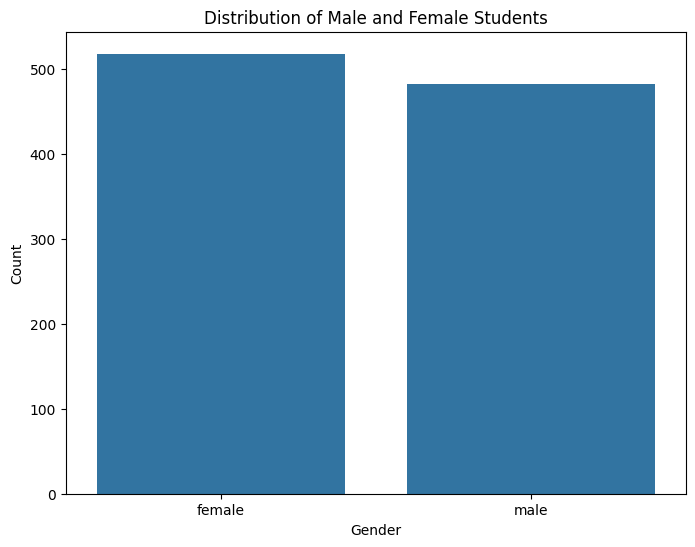

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_capped)
plt.title('Distribution of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

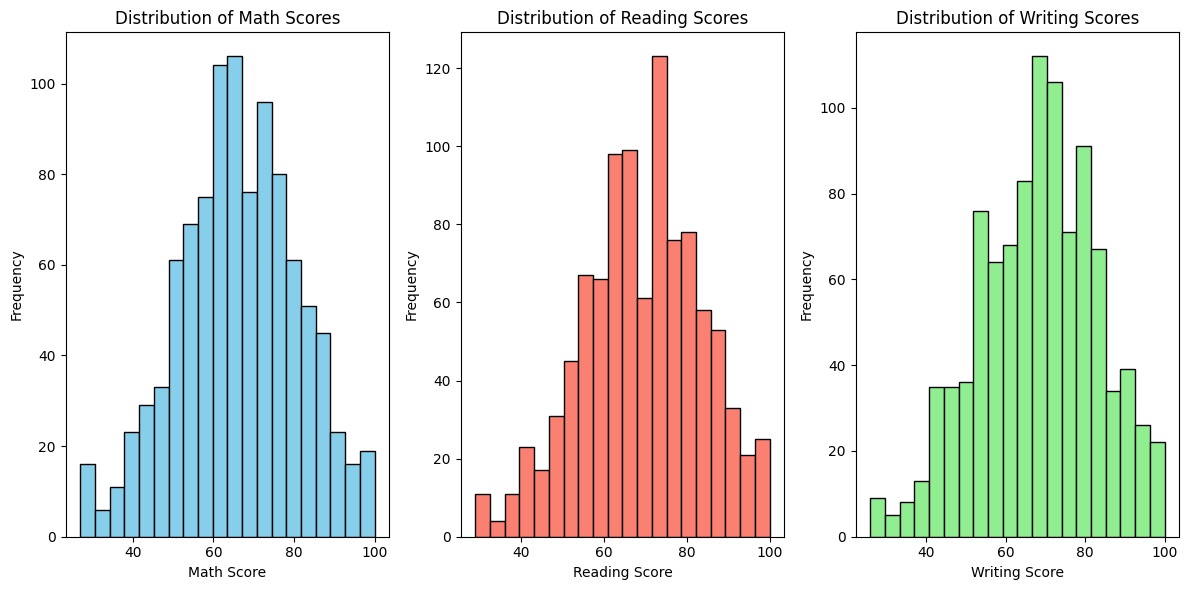

In [10]:
# Histograms for math, reading, and writing scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df_capped['math score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)
plt.hist(df_capped['reading score'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(df_capped['writing score'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

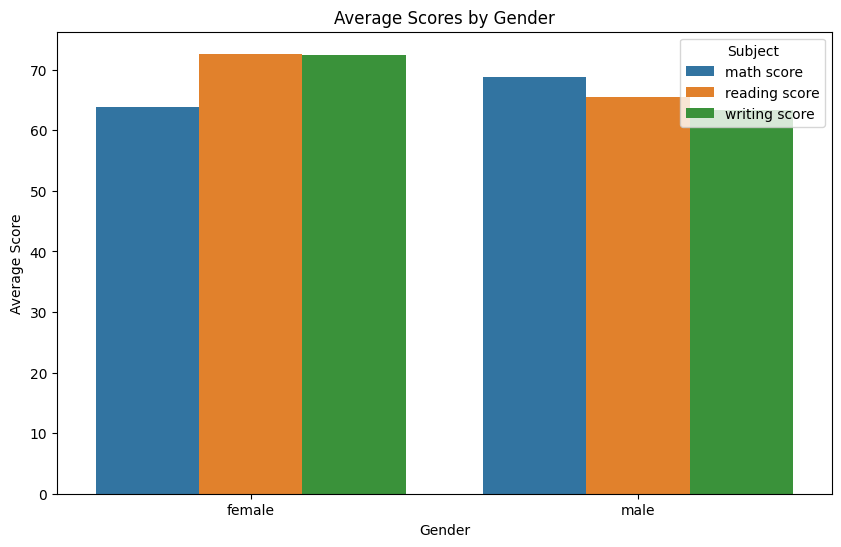

In [11]:
# Calculate the average scores for each gender using pivot_table
average_scores = df_capped.pivot_table(index='gender', values=['math score', 'reading score', 'writing score'], aggfunc='mean').reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='value', hue='variable', data=pd.melt(average_scores, id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score']))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Subject', loc='upper right')
plt.show()

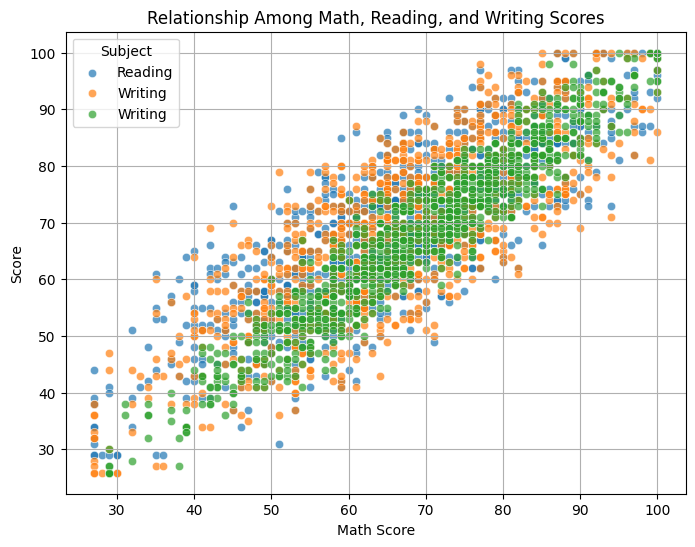

In [16]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', data=df_capped, label='Reading', alpha=0.7)
sns.scatterplot(x='math score', y='writing score', data=df_capped, label='Writing', alpha=0.7)
sns.scatterplot(x='reading score', y='writing score', data=df_capped, label='Writing', alpha=0.7)

plt.title('Relationship Among Math, Reading, and Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Score')
plt.legend(title='Subject', loc='upper left')
plt.grid(True)
plt.show()

# **Basic Statistical Analyses**

In [13]:
# Mean, median, and mode for math, reading, and writing scores
mean_scores = df_capped[['math score', 'reading score', 'writing score']].mean()
median_scores = df_capped[['math score', 'reading score', 'writing score']].median()
mode_scores = df_capped[['math score', 'reading score', 'writing score']].mode().iloc[0]

# Display the results
print("Mean Scores:")
print(mean_scores)
print("\nMedian Scores:")
print(median_scores)
print("\nMode Scores:")
print(mode_scores)

Mean Scores:
math score       66.165000
reading score    69.201000
writing score    68.094375
dtype: float64

Median Scores:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode Scores:
math score       65.0
reading score    72.0
writing score    74.0
Name: 0, dtype: float64


In [14]:
# Standard deviation for math, reading, and writing scores
std_scores = df_capped[['math score', 'reading score', 'writing score']].std()

# Display the results
print("Standard Deviation Scores:")
print(std_scores)

Standard Deviation Scores:
math score       14.922414
reading score    14.503481
writing score    15.068368
dtype: float64


In [15]:
from scipy.stats import ttest_ind

# t-test for math scores
ttest_math = ttest_ind(df_capped[df_capped['gender'] == 'male']['math score'],
                       df_capped[df_capped['gender'] == 'female']['math score'])
print("T-test for Math Scores:")
print(ttest_math)

# t-test for reading scores
ttest_reading = ttest_ind(df_capped[df_capped['gender'] == 'male']['reading score'],
                          df_capped[df_capped['gender'] == 'female']['reading score'])
print("\nT-test for Reading Scores:")
print(ttest_reading)

# t-test for writing scores
ttest_writing = ttest_ind(df_capped[df_capped['gender'] == 'male']['writing score'],
                          df_capped[df_capped['gender'] == 'female']['writing score'])
print("\nT-test for Writing Scores:")
print(ttest_writing)

T-test for Math Scores:
TtestResult(statistic=np.float64(5.310535876060364), pvalue=np.float64(1.347503651215304e-07), df=np.float64(998.0))

T-test for Reading Scores:
TtestResult(statistic=np.float64(-8.017817458844153), pvalue=np.float64(2.9964495345858663e-15), df=np.float64(998.0))

T-test for Writing Scores:
TtestResult(statistic=np.float64(-10.061885825281898), pvalue=np.float64(9.475859176457149e-23), df=np.float64(998.0))
